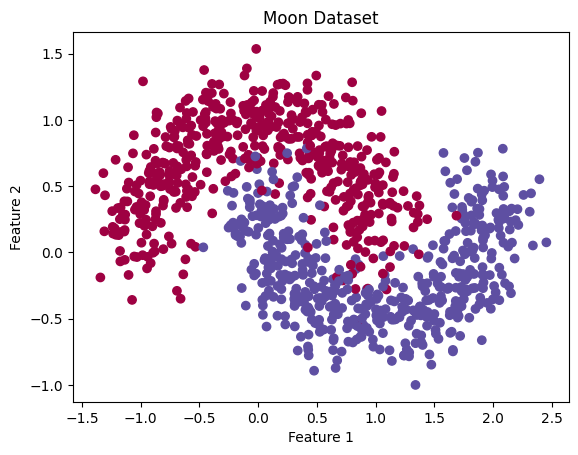

Cost after iteration 0: 0.6930092971839329
Cost after iteration 1000: 0.09818187442717016
Cost after iteration 2000: 0.08386338070314611
Cost after iteration 3000: 0.08241598602041955
Cost after iteration 4000: 0.0818821179582256
Cost after iteration 5000: 0.0816084767932046
Cost after iteration 6000: 0.08144168455631155
Cost after iteration 7000: 0.08132911153327797
Cost after iteration 8000: 0.08231724917233821
Cost after iteration 9000: 0.08224278646514759


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

def compute_cost(A2, Y):
    m = Y.shape[1]
    return -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2 = cache["A1"], cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

def update_parameters(parameters, grads, learning_rate):
    for param in parameters:
        parameters[param] -= learning_rate * grads["d" + param]
    return parameters

def model(X, Y, n_h, num_iterations, learning_rate):
    parameters = initialize_parameters(X.shape[0], n_h, Y.shape[0])
    for i in range(num_iterations):
        cache = forward_propagation(X, parameters)
        cost = compute_cost(cache["A2"], Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters

# Generating the dataset
X, Y = make_moons(n_samples=1000, noise=0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title("Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Preparing data for the model
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.reshape(1, -1), Y_test.reshape(1, -1)

# Training the model
parameters = model(X_train, Y_train, n_h=3, num_iterations=10000, learning_rate=1.2)

# Add function to plot decision boundary here if needed
